<a href="https://colab.research.google.com/github/flavio-mota/sin260-genetico/blob/main/SIN260_Sistemas_Inteligentes_Algortimo_Gen%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação de um Algoritmo Genético

Isabela Neves Drummond
<br>Flávio Belizário da Silva Mota

<hr>

<br> O objetivo dessa implementação é um algoritmo genético para encontrar o valor de x para o qual a função f(x) = x² - 3x + 4 assume o valor máximo.

- Assumir que x [-10, +10];

- Codificar x como vetor binário;

- Criar uma população inicial com 30 indivíduos;

- Aplicar Mutação com taxa de 1%;

- Aplicar Crossover com taxa de 70%;

- Usar seleção por torneio;

- Usar 50 gerações.


Bibliotecas para a implementação:

In [ ]:
from random import SystemRandom
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

Ajustando o gerador de números aleatórios:

In [ ]:
random = SystemRandom()

Definindo uma função para plotagem do gráfico da função de segundo grau:

In [ ]:
def plot_fx(f, xlim, ax):
    f_ = sympify(f)
    print('f(x) = {}'.format(f_))
    f = lambdify('x', f_, 'numpy')
    x = np.linspace(xlim[0], xlim[1], 100)

    ax.plot(x, f(x), label=f_)

Classe do algortimo genético com seus atributos e métodos:

In [ ]:
class AlgoritmoGenetico():
    """
        Algoritmo genético para encontrar o x para o qual a função x^2 - 3x + 4 assume o valor máximo
    """
    def __init__(self, x_min, x_max, tam_populacao, taxa_mutacao, taxa_crossover, num_geracoes):
        """
            Inicializa todos os atributos da instância
        """
        self.x_min = x_min
        self.x_max = x_max
        self.tam_populacao = tam_populacao
        self.taxa_mutacao = taxa_mutacao
        self.taxa_crossover = taxa_crossover
        self.num_geracoes = num_geracoes
        # calcula o número de bits do x_min e x_máx no formato binário com sinal
        qtd_bits_x_min = len(bin(x_min).replace('0b', '' if x_min < 0 else '+'))
        qtd_bits_x_max = len(bin(x_max).replace('0b', '' if x_max < 0 else '+'))
        # o maior número de bits representa o número de bits a ser utilizado para gerar individuos
        self.num_bits = qtd_bits_x_max if qtd_bits_x_max >= qtd_bits_x_min else qtd_bits_x_min
        # gera os individuos da população
        self._gerar_populacao()

    def _gerar_populacao(self):
        """
            Gera uma população de um determinado tamanho com individuos que possuem um número
            expecífico de bits
        """
        # inicializa uma população de "tam_população" inviduos vazios
        self.populacao = [[] for _ in range(self.tam_populacao)]
        # preenche a população
        for individuo in self.populacao:
            # para cada individuo da população sorteia números entre "x_min" e "x_max"
            num = random.randint(self.x_min, self.x_max)
            # converte o número sorteado para formato binário com sinal
            num_bin = bin(num).replace('0b', '' if num < 0 else '+').zfill(self.num_bits)
            # transforma o número binário resultante em um vetor
            for bit in num_bin:
                individuo.append(bit)

    def _funcao_objetivo(self, num_bin):
        """
            Calcula a função objetivo utilizada para avlaiar as soluções produzidas
        """
        # converte o número binário para o formato inteiro
        num = int(''.join(num_bin), 2)
        # calcula e retorna o resultado da função objetivo
        return num**2 - 3*num + 4

    def avaliar(self):
        """
            Avalia as souluções produzidas, associando uma nota/avalição a cada elemento da população
        """
        self.avaliacao = []
        for individuo in self.populacao:
            self.avaliacao.append(self._funcao_objetivo(individuo))

    def selecionar(self):
        """
            Realiza a seleção do individuo mais apto por torneio, considerando N = 2
        """
        # agrupa os individuos com suas avaliações para gerar os participantes do torneio
        participantes_torneio = list(zip(self.populacao, self.avaliacao))
        # escolhe dois individuos aleatoriamente
        individuo_1 = participantes_torneio[random.randint(0, self.tam_populacao - 1)]
        individuo_2 = participantes_torneio[random.randint(0, self.tam_populacao - 1)]
        # retorna individuo com a maior avaliação, ou seja, o vencedor do torneio
        return individuo_1[0] if individuo_1[1] >= individuo_2[1] else individuo_2[0]

    def _ajustar(self, individuo):
        """
            Caso o individuo esteja fora dos limites de x, ele é ajustado de acordo com o limite mais próximo
        """
        if int(''.join(individuo), 2) < self.x_min:
            # se o individuo é menor que o limite mínimo, ele é substituido pelo próprio limite mínimo
            ajuste = bin(self.x_min).replace('0b', '' if self.x_min < 0 else '+').zfill(self.num_bits)
            for indice, bit in enumerate(ajuste):
                individuo[indice] = bit
        elif int(''.join(individuo), 2) > self.x_max:
            # se o individuo é maior que o limite máximo, ele é substituido pelo próprio limite máximo
            ajuste = bin(self.x_max).replace('0b', '' if self.x_max < 0 else '+').zfill(self.num_bits)
            for indice, bit in enumerate(ajuste):
                individuo[indice] = bit

    def crossover(self, pai, mae):
        """
            Aplica o crossover de acordo com uma dada probabilidade (taxa de crossover)
        """
        if random.randint(1, 100) <= self.taxa_crossover:
            # caso o crossover seja aplicado os pais trocam suas caldas e com isso geram dois filhos
            ponto_de_corte = random.randint(1, self.num_bits - 1)
            filho_1 = pai[:ponto_de_corte] + mae[ponto_de_corte:]
            filho_2 = mae[:ponto_de_corte] + pai[ponto_de_corte:]
            # se algum dos filhos estiver fora dos limites de x, ele é ajustado de acordo com o limite
            # mais próximo
            self._ajustar(filho_1)
            self._ajustar(filho_2)    
        else:
            # caso contrário os filhos são cópias exatas dos pais
            filho_1 = pai[:]
            filho_2 = mae[:]

        # retorna os filhos obtidos pelo crossover
        return filho_1, filho_2

    def mutar(self, individuo):
        """
            Realiza a mutação dos bits de um indiviuo conforme uma dada probabilidade
            (taxa de mutação)
        """
        # cria a tabela com as regras de mutação
        tabela_mutacao = str.maketrans('+-01', '-+10')
        # caso a taxa de mutação seja atingida, ela é realizada em um bit aleatório
        if random.randint(1, 100) <= self.taxa_mutacao:
            bit = random.randint(0, self.num_bits - 1)
            individuo[bit] = individuo[bit].translate(tabela_mutacao)

        # se o individuo estiver fora dos limites de x, ele é ajustado de acordo com o
        # limite mais próximo
        self._ajustar(individuo)

    def econtrar_filho_mais_apto(self):
        """
            Busca o individuo com a melhor avaliação dentro da população
        """
        # agrupa os individuos com suas avaliações para gerar os candidatos
        candidatos = list(zip(self.populacao, self.avaliacao))
        # retorna o candidato com a melhor avaliação, ou seja, o mais apto da população
        return max(candidatos)

Teste do algoritmo e das gerações

Resultado 0: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 1: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 2: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 3: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 4: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 5: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 6: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 7: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 8: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 9: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 10: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 11: x = -10, (individuo, valor máximo) (['-', '1', '0', '1', '0'], 134)
Resultado 12: x = -10, (in

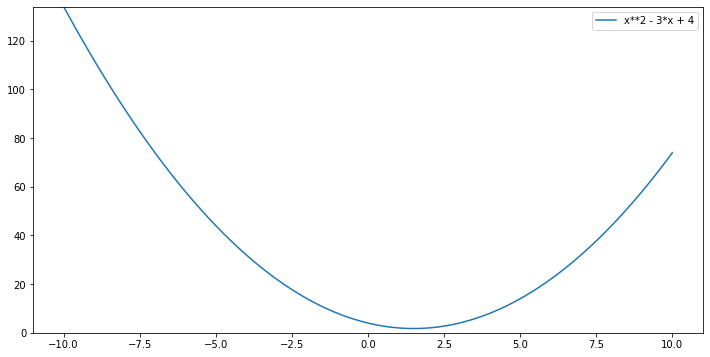

In [ ]:
# cria uma instância do algoritmo genético com as configurações do enunciado
algoritmo_genetico = AlgoritmoGenetico(-10, 10, 30, 1, 70, 50)
# realiza a avaliação da população inicial
algoritmo_genetico.avaliar()
# executa o algoritmo por "num_gerações"
for i in range(algoritmo_genetico.num_geracoes):
    # imprime o resultado a cada geração, começando da população original
    mais_apto = algoritmo_genetico.econtrar_filho_mais_apto()
    print('Resultado {}: x = {}, (individuo, valor máximo) {}'.format(i, int(''.join(mais_apto[0]), 2), mais_apto))
    # cria uma nova população e a preenche enquanto não estiver completa
    nova_populacao = []
    while len(nova_populacao) < algoritmo_genetico.tam_populacao:
        # seleciona os pais
        pai = algoritmo_genetico.selecionar()
        mae = algoritmo_genetico.selecionar()
        # realiza o crossover dos pais para gerar os filhos
        filho_1, filho_2 = algoritmo_genetico.crossover(pai, mae)
        # realiza a mutação dos filhos e os adiciona à nova população
        algoritmo_genetico.mutar(filho_1)
        algoritmo_genetico.mutar(filho_2)
        nova_populacao.append(filho_1)
        nova_populacao.append(filho_2)
    # substitui a população antiga pela nova e realiza sua avaliação
    algoritmo_genetico.populacao = nova_populacao
    algoritmo_genetico.avaliar()

# procura o filho mais apto dentro da população e exibe o resultado do algoritmo genético
mais_apto = algoritmo_genetico.econtrar_filho_mais_apto()
print('Resultado {}: x = {}, (individuo, valor máximo) {}'.format(i+1, int(''.join(mais_apto[0]), 2), mais_apto))

f = 'x^2 - 3*x + 4'
xlim = (algoritmo_genetico.x_min, algoritmo_genetico.x_max)
ylim = (0, mais_apto[1])
figsize = (12, 6)
# figure
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_ylim(ylim[0], ylim[1])

# plots
plot_fx(f, xlim=xlim, ax=ax)
ax.legend()

Fontes:

[Implementação - Thiago P. Nobre](https://github.com/thiagopnobre/algoritmo_genetico)
<br>Algoritmos Genéticos - Ricardo Arantes Alves. Edicões Inteligentes, São Paulo, 2005. 